In [4]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("movie_metadata.csv")

In [7]:
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
566,Color,Barry Levinson,108.0,134.0,272.0,215.0,James Pickens Jr.,548.0,36976367.0,Drama|Mystery|Sci-Fi|Thriller,...,274.0,English,USA,PG-13,75000000.0,1998.0,270.0,6.0,2.35,0
4093,Color,Mel Stuart,104.0,89.0,21.0,124.0,Jack Albertson,240.0,NaN,Family|Fantasy|Musical,...,349.0,English,USA,G,3000000.0,1971.0,177.0,7.8,1.33,0
4568,Color,Don Coscarelli,260.0,92.0,152.0,124.0,Ossie Davis,1000.0,NaN,Comedy|Fantasy|Mystery,...,366.0,English,USA,R,1000000.0,2002.0,282.0,7.2,1.85,0
1444,Color,NaN,3.0,60.0,NaN,628.0,Kimberly Elise,897.0,NaN,Drama|Romance,...,11.0,English,USA,NaN,NaN,NaN,637.0,7.0,NaN,265
213,Color,Louis Leterrier,344.0,106.0,255.0,850.0,Jason Flemyng,14000.0,163192114.0,Action|Adventure|Fantasy,...,637.0,English,USA,PG-13,125000000.0,2010.0,1000.0,5.8,2.35,15000


In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
df.shape

(5043, 28)

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
df['gross'].fillna(df['gross'].median(),inplace=True)
df['budget'].fillna(df['budget'].median(),inplace=True)
df.dropna(inplace=True)

In [10]:
df.shape

(4409, 28)

## About the Data (EDA)

### Creating a new column to show main genre of movie. This will help in sorting out movies according to their genre types

In [11]:
summary_stats = df.describe()

# Display the summary statistics
print(summary_stats)

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4409.000000  4409.000000              4409.000000   
mean               155.096847   109.355863               757.508959   
std                120.743099    22.381705              2954.169039   
min                  1.000000    20.000000                 0.000000   
25%                 66.000000    95.000000                10.000000   
50%                125.000000   105.000000                57.000000   
75%                211.000000   119.000000               221.000000   
max                813.000000   330.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             4409.000000             4409.000000  4.409000e+03   
mean               701.687684             7113.826718  4.798048e+07   
std               1766.600120            14843.701640  6.609049e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

In [13]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x) 

In [13]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
383,Color,Brian De Palma,181.0,114.0,0.0,281.0,Connie Nielsen,3000.0,60874615.0,Adventure|Sci-Fi|Thriller,...,English,USA,PG,90000000.0,2000.0,933.0,5.6,2.35,0,Adventure
763,Color,Jean-Pierre Jeunet,223.0,116.0,0.0,672.0,Michael Wincott,1000.0,47748610.0,Action|Horror|Sci-Fi,...,English,USA,R,75000000.0,1997.0,720.0,6.3,2.35,0,Action


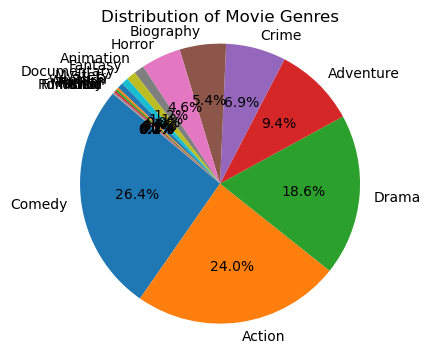

In [14]:
genre_counts = df['main_genre'].value_counts()
# Plot a pie chart
plt.figure(figsize=(5, 4))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

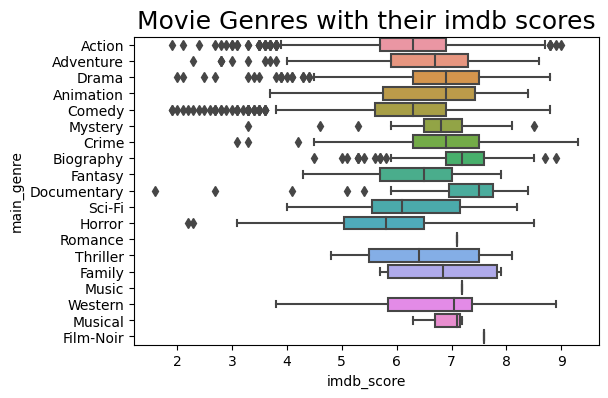

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='imdb_score',y='main_genre',data=df)
plt.title('Movie Genres with their imdb scores',fontsize=18)
plt.show()

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [17]:
df.shape

(3630, 29)

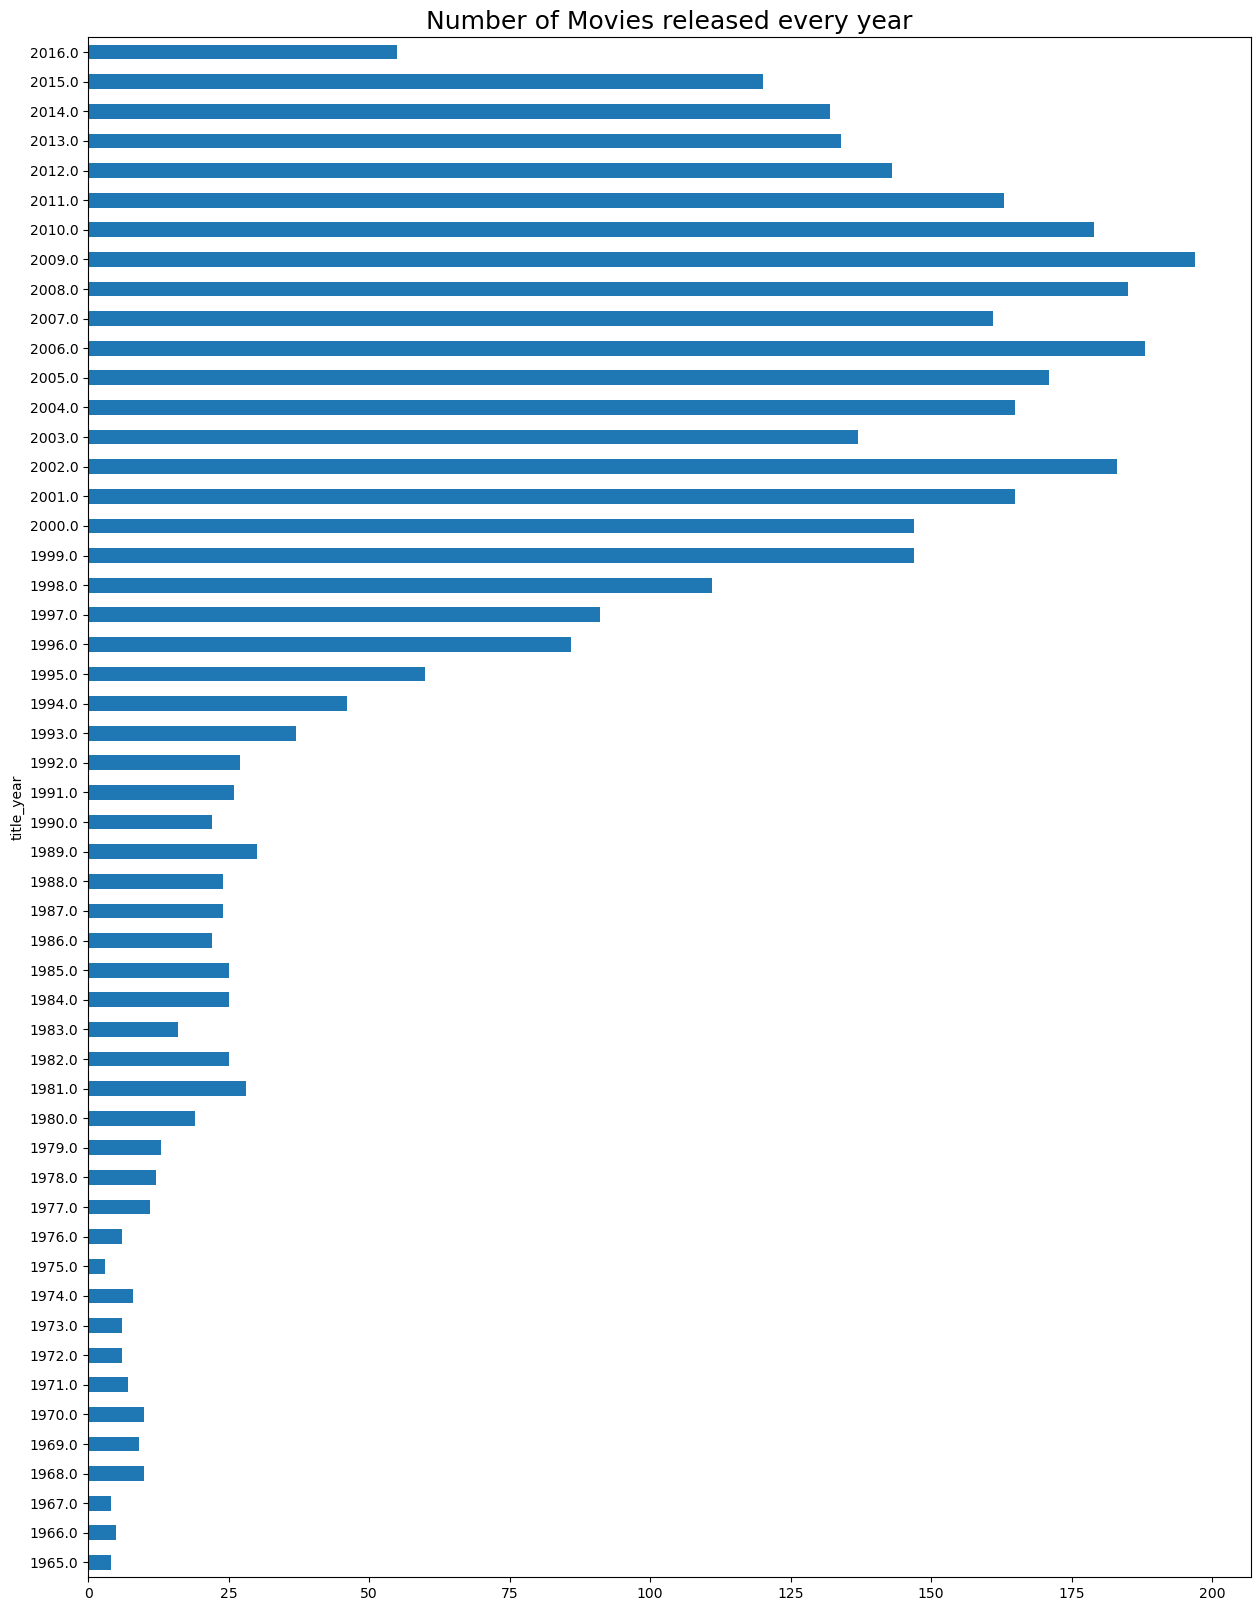

In [38]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

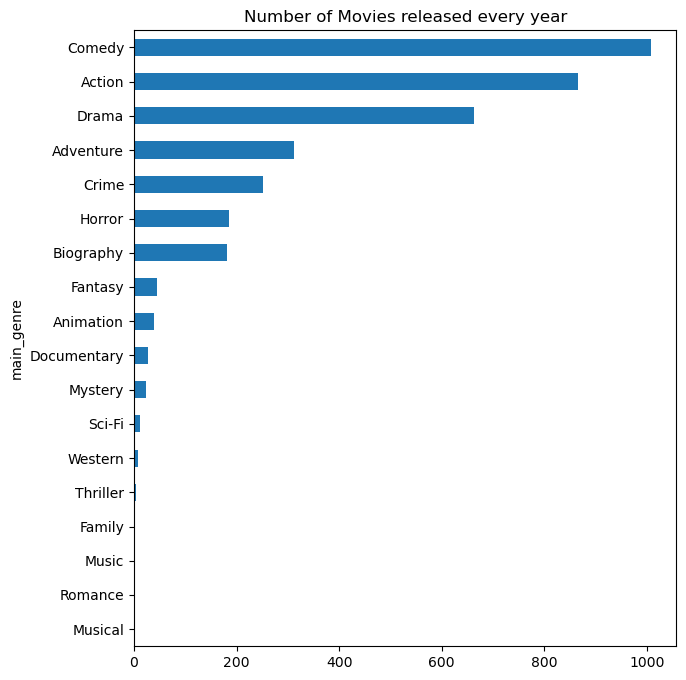

In [67]:
df.main_genre.value_counts(dropna=True).sort_values().plot(kind='barh',figsize=(7,8))
plt.title("Number of Movies released every year",fontsize=12)
plt.show()

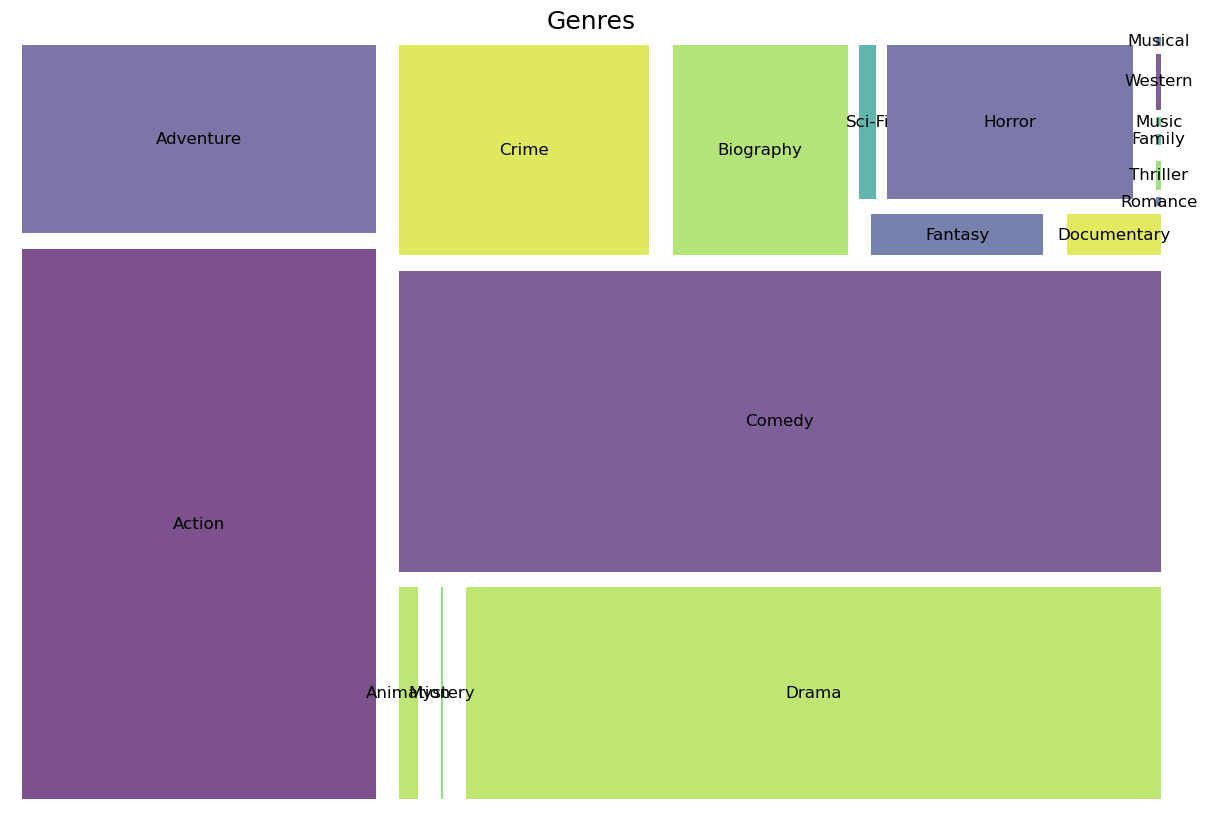

In [68]:
plt.figure(figsize=(15, 10))
squarify.plot(Counter(df['main_genre']).values(),label=Counter(df['main_genre']).keys(),text_kwargs={'fontsize':12}
             ,bar_kwargs={'alpha':.7},pad=True)
plt.title("Genres",fontsize=18)
plt.axis("off")
plt.show()

In [37]:
# Movies with the lowest Imdb rating 
df[df['imdb_score']==3.3]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
313,Color,Pitof,212.0,87.0,26.0,566.0,Christopher Heyerdahl,827.0,40198710.0,Action|Crime|Fantasy|Romance|Thriller,...,USA,PG-13,100000000.0,2004.0,825.0,3.3,2.35,0,Action,5
1303,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,UK,R,42000000.0,2002.0,886.0,3.3,2.35,612,Crime,3
1934,Color,Bob Spiers,33.0,93.0,14.0,199.0,Richard Briers,1000.0,29247405.0,Comedy|Family|Music,...,UK,PG,25000000.0,1997.0,401.0,3.3,1.85,0,Comedy,3
2519,Color,Ian Iqbal Rashid,62.0,94.0,8.0,66.0,Clé Bennett,328.0,7070459.0,Drama,...,Canada,PG-13,20000000.0,2007.0,122.0,3.3,1.85,238,Drama,1
2550,Color,Perry Andelin Blake,56.0,80.0,11.0,499.0,Kenan Thompson,911.0,40363530.0,Comedy|Family,...,USA,PG,16000000.0,2002.0,521.0,3.3,1.85,1000,Comedy,2
2935,Color,Tamra Davis,111.0,93.0,33.0,135.0,Katherine Boecher,1000.0,37188667.0,Comedy|Drama,...,USA,PG-13,12000000.0,2002.0,188.0,3.3,1.85,0,Comedy,2
3197,Color,Tom Brady,49.0,97.0,105.0,269.0,Kevin Nealon,982.0,2331318.0,Comedy,...,USA,R,10000000.0,2011.0,503.0,3.3,1.85,0,Comedy,1
3230,Color,Alan Metter,17.0,83.0,3.0,421.0,Michael Winslow,16000.0,126247.0,Comedy|Crime,...,USA,PG,6200000.0,1994.0,542.0,3.3,1.85,321,Comedy,2
3799,Color,Klaus Menzel,13.0,103.0,34.0,227.0,Jacqueline Bisset,811.0,16066.0,Mystery|Romance|Thriller,...,Germany,R,5000000.0,2004.0,522.0,3.3,2.35,40,Mystery,3
4005,Color,Anthony C. Ferrante,139.0,97.0,48.0,689.0,John Heard,984.0,25517500.0,Horror,...,USA,TV-14,1000000.0,2013.0,697.0,3.3,1.78,93000,Horror,1


In [20]:
# Movie with the highest Imdb rating
df[df['imdb_score']==8.9]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000,Western


## Histogram of all columns in df

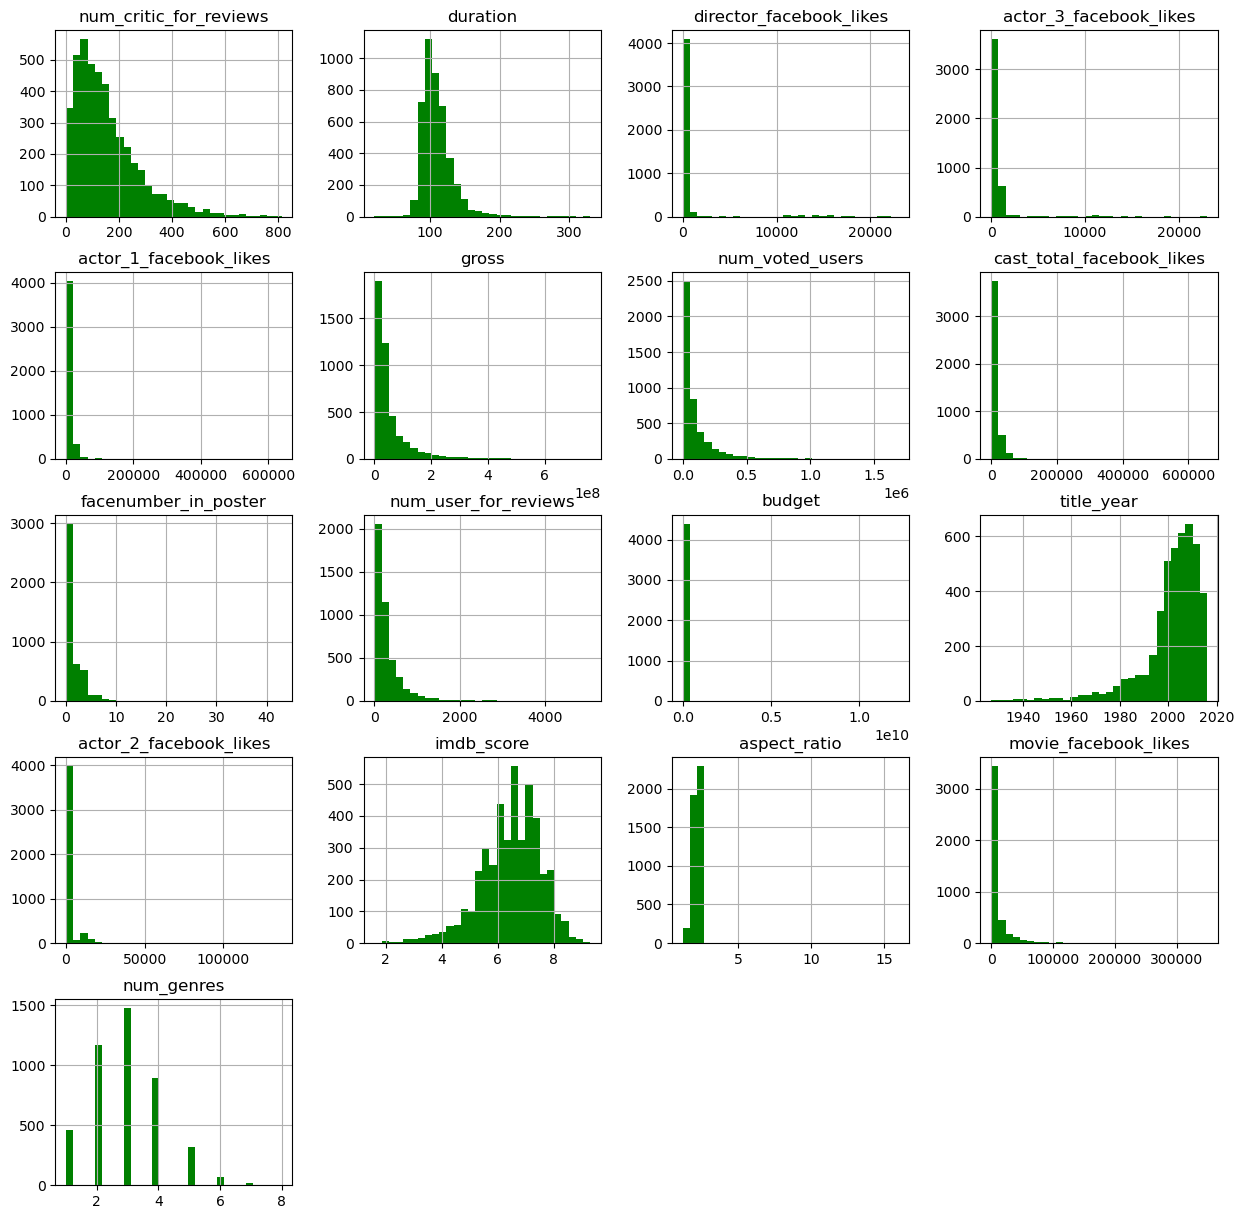

In [39]:
df.hist(bins=30,figsize=(15,15),color='g')
plt.show()

## Adding New Column that shows number of genres in movie

In [21]:
df['num_genres'] = df.genres.apply(lambda x: len(x.split('|')))

In [22]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
169,Color,Breck Eisner,163.0,124.0,42.0,848.0,Rainn Wilson,11000.0,68642452.0,Action|Adventure|Comedy|Thriller,...,UK,PG-13,130000000.0,2005.0,973.0,6.0,2.35,0,Action,4
1406,Color,Seth Gordon,340.0,106.0,91.0,64.0,Lindsay Sloane,18000.0,117528646.0,Comedy|Crime,...,USA,R,35000000.0,2011.0,464.0,6.9,2.35,31000,Comedy,2


In [23]:
df.num_genres.max()

8

In [24]:
df[df.num_genres==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,58297830.0,Adventure|Animation|Drama|Family|Fantasy|Music...,...,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,Adventure,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,23360779.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,...,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,Action,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,1183354.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,...,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,Action,8


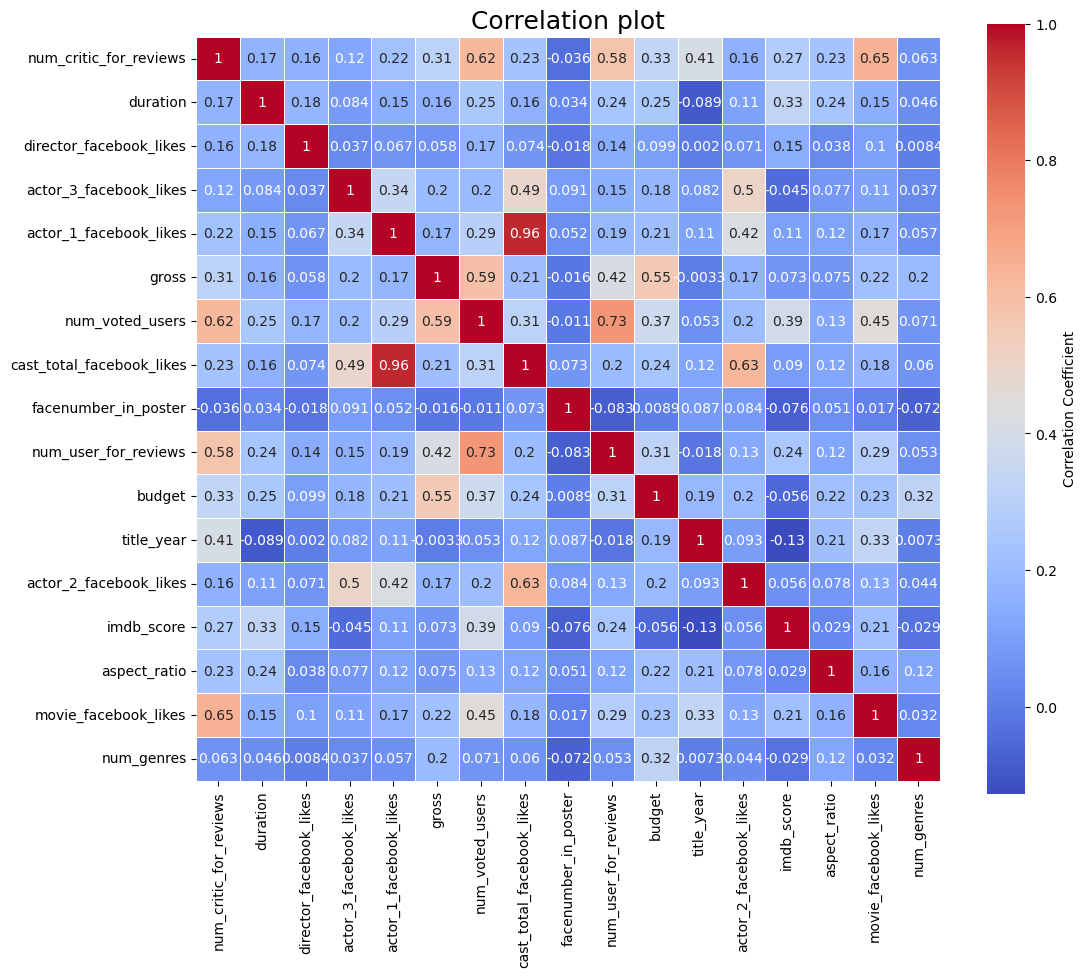

In [25]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, cmap='coolwarm', square=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation plot", fontsize=18)
plt.show()

### Selected Cols for model
num_critic_for_reviews<br>
duration<br>
num_voted_users<br>
num_user_for_reviews<br>
movie_facbook_likes<br>
director_facebook_likes<br>

In [26]:
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes']]
y = df['imdb_score']

In [27]:
X.shape,y.shape

((3630, 6), (3630,))

In [30]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm= lm.predict(X_test)
print("Mean squared error using linear regression",mean_squared_error(y_test,pred_lm))
print("Mean absolute error using linear regression",mean_absolute_error(y_test,pred_lm))

Mean squared error using linear regression 0.7164616789200854
Mean absolute error using linear regression 0.6674037063372618


In [32]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print("Mean squared error using Decision Tree Regression",mean_squared_error(y_test,pred_dt))
print("Mean absolute error using Decision Tree regression",mean_absolute_error(y_test,pred_dt))

Mean squared error using Decision Tree Regression 1.334077134986226
Mean absolute error using Decision Tree regression 0.88732782369146


In [33]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("Mean squared error using Support Vector regression",mean_squared_error(y_test,pred_svr))
print("Mean absolute error using Support Vector regression",mean_absolute_error(y_test,pred_svr))

Mean squared error using Support Vector regression 0.7897038097630096
Mean absolute error using Support Vector regression 0.6988435995927077


In [34]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Mean squared error using KNN regression",mean_squared_error(y_test,pred_knn))
print("Mean absolute error using KNN regression",mean_absolute_error(y_test,pred_knn))

Mean squared error using KNN regression 0.8213567493112947
Mean absolute error using KNN regression 0.7115472910927455


### Conclusion:
#### Linear Regression model seems to perform best among all with MSE = 0.67 and MAE = 0.65

## To work with Classification models, Adding another column "movie_status" that contains wether movie is hit or (flop or average)

In [50]:
def getStatus(row):
    bgt = row['budget']
    grs = row['gross']
    
    if bgt*3<=grs:
        return 1
    return 0
    

In [51]:
df['movie_status'] = df[['budget','gross']].apply(getStatus, axis=1) #1 means HIT, 0 means FLOP

In [52]:
df['movie_status']

5       0
7       0
12      0
14      0
16      0
       ..
5026    1
5027    1
5033    1
5035    1
5042    1
Name: movie_status, Length: 3630, dtype: int64

In [60]:
y = df['movie_status']
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes','imdb_score','budget','gross']]

In [61]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [62]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print("Classification Report for Suppprt Vector Classifier:\n", classification_report(y_test, pred_svc))
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy score for Support Vector Classifier: ", accuracy)

Classification Report for Suppprt Vector Classifier:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       589
           1       0.99      0.85      0.92       137

    accuracy                           0.97       726
   macro avg       0.98      0.93      0.95       726
weighted avg       0.97      0.97      0.97       726

Accuracy score for Support Vector Classifier:  0.9710743801652892


In [63]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_knn_cls = knn.predict(X_test)
print("Classification Report for KNN Classifier:\n", classification_report(y_test, pred_knn_cls))
accuracy = accuracy_score(y_test, pred_knn_cls)
print("Accuracy score for KNN Classifier: ", accuracy)

Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       589
           1       0.97      0.89      0.93       137

    accuracy                           0.97       726
   macro avg       0.97      0.94      0.96       726
weighted avg       0.97      0.97      0.97       726

Accuracy score for KNN Classifier:  0.9738292011019284


In [64]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
pred_dt_cls = dt_cls.predict(X_test)
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, pred_dt_cls))
accuracy = accuracy_score(y_test, pred_dt_cls)
print("Accuracy score for Decision Tree Classifier: ", accuracy)

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       589
           1       0.98      0.93      0.95       137

    accuracy                           0.98       726
   macro avg       0.98      0.96      0.97       726
weighted avg       0.98      0.98      0.98       726

Accuracy score for Decision Tree Classifier:  0.9820936639118457


In [65]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
pred_rf_cls = rf_classifier.predict(X_test)
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, pred_rf_cls))
accuracy = accuracy_score(y_test, pred_rf_cls)
print("Accuracy score for Random Forest Classifier: ", accuracy)

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       589
           1       1.00      0.82      0.90       137

    accuracy                           0.97       726
   macro avg       0.98      0.91      0.94       726
weighted avg       0.97      0.97      0.96       726

Accuracy score for Random Forest Classifier:  0.9655647382920111


In [66]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
pred_lr_cls = lr_classifier.predict(X_test)
print("Classification Report for Logistic Regression Classifier:\n", classification_report(y_test, pred_lr_cls))
accuracy = accuracy_score(y_test, pred_lr_cls)
print("Accuracy score for Logistic Regression Classifier: ", accuracy)

Classification Report for Logistic Regression Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       0.99      1.00      1.00       137

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

Accuracy score for Logistic Regression Classifier:  0.9986225895316805


### Conclusion:
#### Logistic Regression Classifier seems to perform best among all, as it has 99% accuracy